In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading demographic data
demographics = pd.read_csv('datasets\demographic.csv')

demographics = demographics[demographics['year'] >= 1985] 
demographics = demographics[demographics['year'] <= 2015]

demographics.head()


,country,year,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,population,migration,political_stability,country_code
25,AFGHANISTAN,1985,NaN,NaN,NaN,45.566,7.458,11783050.0,NaN,NaN,AFG
26,AFGHANISTAN,1986,NaN,NaN,NaN,46.417,7.460,11601041.0,NaN,NaN,AFG
27,AFGHANISTAN,1987,NaN,NaN,NaN,47.288,7.461,11502761.0,-1484185.0,NaN,AFG
28,AFGHANISTAN,1988,NaN,NaN,NaN,48.164,7.461,11540888.0,NaN,NaN,AFG
29,AFGHANISTAN,1989,NaN,NaN,NaN,49.028,7.461,11777609.0,NaN,NaN,AFG


In [9]:
#loading suicides data
suicides = pd.read_csv('datasets\suicide-rates-overview-1985-to-2016.csv')

suicides = suicides[suicides['year'] >= 1985]
suicides = suicides[suicides['year'] <= 2015]
suicides = suicides.drop("country-year", axis=1)

suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [10]:
#adding country codes to suicides dataframe
countryCodes = pd.read_csv('datasets\wikipedia-iso-country-codes.csv')
countryCodes.head()

suicides = pd.merge(suicides,countryCodes[['country','country_code']],on='country')
suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,ALB


In [11]:
#loading world health data
health = pd.read_csv('datasets\world-health.csv')
health.columns
health.count()/health.shape[0]

country           1.000000
country_code      1.000000
indicator_name    1.000000
indicator_code    1.000000
1960              0.398629
1961              0.396866
1962              0.403202
1963              0.398292
1964              0.398641
1965              0.399989
1966              0.399259
1967              0.404696
1968              0.399697
1969              0.400292
1970              0.414673
1971              0.422177
1972              0.427087
1973              0.421773
1974              0.422132
1975              0.424222
1976              0.424424
1977              0.429210
1978              0.424638
1979              0.425211
1980              0.433412
1981              0.436232
1982              0.440198
1983              0.435592
1984              0.437749
1985              0.438378
                    ...   
1987              0.447500
1988              0.440018
1989              0.441321
1990              0.536142
1991              0.530626
1992              0.538400
1

In [12]:
#removing non relevant years
health = health[['country', 'country_code', 'indicator_name', 'indicator_code', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',]]

health.head()

,country,country_code,indicator_name,indicator_code,1985,1986,1987,1988,1989,1990,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,80.359323,76.441596,72.51458,71.170664,69.888768,69.004413,...,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#merging suicides and demographics
suicides = pd.merge(suicides,demographics,on=['year','country_code'])
suicides = suicides.drop("country_y", axis=1)
suicides = suicides.rename (columns = {'country_x': 'country', 'population_x': 'population', 'population_y': 'total_population'})
suicides.reset_index(drop=True)
suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,total_population,migration,political_stability
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,ALB,760.0,0.000029,NaN,71.76,3.164,3083605.0,-99.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,ALB,760.0,0.000029,NaN,71.76,3.164,3083605.0,-99.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,ALB,760.0,0.000029,NaN,71.76,3.164,3083605.0,-99.0,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,ALB,760.0,0.000029,NaN,71.76,3.164,3083605.0,-99.0,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,ALB,760.0,0.000029,NaN,71.76,3.164,3083605.0,-99.0,NaN


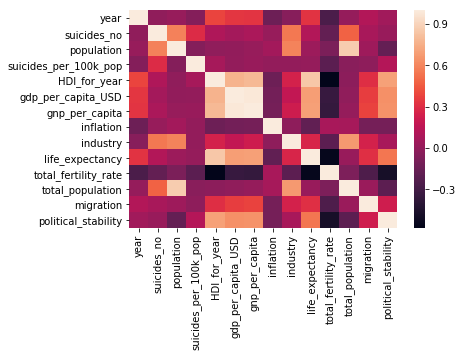

In [14]:
corr = suicides.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [15]:
#pd.crosstab(suicides.country, suicides.suicides_no, margins=True)
SuicidesPerCountry=suicides.groupby(['country']).agg({'suicides_no': 'count'})
SuicidesPerCountry

,suicides_no
country,
Albania,264
Argentina,372
Armenia,288
Aruba,168
Australia,360
Austria,372
Azerbaijan,192
Bahrain,252
Barbados,300


In [16]:
SuicidesByGenre=suicides.groupby(['country','sex']).agg({'suicides_no': 'count'})
SuicidesByGenre

suicides_no
country              sex                
Albania              female          132
                     male            132
Argentina            female          186
                     male            186
Armenia              female          144
                     male            144
Aruba                female           84
                     male             84
Australia            female          180
                     male            180
Austria              female          186
                     male            186
Azerbaijan           female           96
                     male             96
Bahrain              female          126
                     male            126
Barbados             female          150
                     male            150
Belarus              female          126
                     male            126
Belgium              female          186
                     male            186
Belize               female          168
                     male            168
Brazil               female          186
                     male            186
Bulgaria             female          180
                     male            180
Canada               female          174
                     male            174
...                                  ...
Slovenia             female          126
                     male            126
South Africa         female          120
                     male            120
Spain                female          186
                     male            186
Sri Lanka            female           66
                     male             66
Suriname             female          168
                     male            168
Sweden               female          174
                     male            174
Switzerland          female          126
                     male            126
Thailand             female          162
                     male            162
Turkey               female           42
                     male             42
Turkmenistan         female          174
                     male            174
Ukraine              female          168
                     male            168
United Arab Emirates female           36
                     male             36
United Kingdom       female          186
                     male            186
Uruguay              female          168
                     male            168
Uzbekistan           female          132
                     male            132

[170 rows x 1 columns]